In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder 
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
xls = pd.ExcelFile("Kmpg1.xlsx").sheet_names #sheets in the data set

print(xls) # sheets in the excel file

['Transactions', 'NewCustomerList', 'CustomerDemographic', 'CustomerAddress']


### loading sheets in the excel file

In [3]:

transactions = pd.read_excel("Kmpg1.xlsx",sheet_name=xls[0])
transactions.head(20)
transactions.to_csv("trans.csv")


   

In [4]:
customer_demo = pd.read_excel("Kmpg1.xlsx",sheet_name = xls[2])
customer_demo.head(15)
customer_demo.to_csv("demo.csv")

In [5]:
customer_add = pd.read_excel("Kmpg1.xlsx",sheet_name = xls[3])
customer_add.head(15)
customer_add.to_csv("address.csv")

#### Transaction sheet overview

In [6]:
transactions.shape #shape of the dataframe
##20000 cases and 13 variables

(20000, 13)

In [7]:
transactions.columns # columns name

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [8]:
transactions.info() # checking the data types of each variable 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [9]:
transactions.transaction_id.duplicated().sum() # checking for duplicated transaction id

# no duplicates

0

In [10]:
# dropping the transaction id column

trans = transactions.drop(columns = ["transaction_id"],inplace=False)
trans.head(10)



,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
5,25,2339,2017-03-08,1.0,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,39031.0
6,22,1542,2017-04-21,1.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,34165.0
7,15,2459,2017-07-15,0.0,Approved,WeareA2B,Standard,medium,medium,1292.84,13.44,39915.0
8,67,1305,2017-08-10,0.0,Approved,Solex,Standard,medium,large,1071.23,380.74,33455.0
9,12,3262,2017-08-30,1.0,Approved,WeareA2B,Standard,medium,medium,1231.15,161.60,38216.0


In [11]:
#checking for empty values
print(trans.isnull().any())
print(f"\n")
print("There are " + str(trans.isnull().sum()) + " columns with empty values")

# online order,brand,product_line,product_class,product_size,standard_cost and product_first_sold_date have empty values

product_id                 False
customer_id                False
transaction_date           False
online_order                True
order_status               False
brand                       True
product_line                True
product_class               True
product_size                True
list_price                 False
standard_cost               True
product_first_sold_date     True
dtype: bool


There are product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64 columns with empty values


In [12]:
trans.transaction_date.nunique()

364

In [13]:
trans.shape

(20000, 12)

In [14]:
#formatting the transaction data to check for invalid transaction datas

trans["year"]= trans.transaction_date.dt.year
trans["month"] = trans.transaction_date.dt.month
trans["day"] = trans.transaction_date.dt.day

In [15]:
trans.set_index(["year","month","day"]).tail()

product_id  customer_id transaction_date  online_order  \
year month day                                                           
2017 6     24           51         1018       2017-06-24           1.0   
     11    9            41          127       2017-11-09           1.0   
     4     14           87         2284       2017-04-14           1.0   
     7     3             6         2764       2017-07-03           0.0   
     9     22           11         1144       2017-09-22           1.0   

               order_status          brand product_line product_class  \
year month day                                                          
2017 6     24      Approved     OHM Cycles     Standard          high   
     11    9       Approved          Solex         Road        medium   
     4     14      Approved     OHM Cycles     Standard        medium   
     7     3       Approved     OHM Cycles     Standard          high   
     9     22      Approved  Trek Bicycles     Standard        medium   

               product_size  list_price  standard_cost  \
year month day                                           
2017 6     24        medium     2005.66        1203.40   
     11    9         medium      416.98         312.74   
     4     14        medium     1636.90          44.71   
     7     3         medium      227.88         136.73   
     9     22         small     1775.81        1580.47   

                product_first_sold_date  
year month day                           
2017 6     24                   37823.0  
     11    9                    35560.0  
     4     14                   40410.0  
     7     3                    38216.0  
     9     22                   36334.0

In [16]:
print("maximum transaction year",trans.year.max())

maximum transaction year 2017


In [17]:
print("minimum transaction year",trans.year.min())

minimum transaction year 2017


In [18]:
# this was a transaction report for the year 2017


In [19]:
trans.day.nunique() # their are 31 unique days in the transaction column date hence no unusual dates

31

In [20]:
trans.describe()

,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date,year,month,day
count,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000,20000.0,20000.000000,20000.000000
mean,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549,2017.0,6.516950,15.579050
std,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110,0.0,3.448914,8.674486
min,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000,2017.0,1.000000,1.000000
25%,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000,2017.0,4.000000,8.000000
50%,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000,2017.0,7.000000,16.000000
75%,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000,2017.0,10.000000,23.000000
max,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000,2017.0,12.000000,31.000000


In [21]:
for i in trans.columns:
    print(f"{i} column has: {trans[i].nunique()} uniques\n")
    # number of unique values in each column

product_id column has: 101 uniques

customer_id column has: 3494 uniques

transaction_date column has: 364 uniques

online_order column has: 2 uniques

order_status column has: 2 uniques

brand column has: 6 uniques

product_line column has: 4 uniques

product_class column has: 3 uniques

product_size column has: 3 uniques

list_price column has: 296 uniques

standard_cost column has: 103 uniques

product_first_sold_date column has: 100 uniques

year column has: 1 uniques

month column has: 12 uniques

day column has: 31 uniques



In [22]:
trans.customer_id.duplicated().sum() # duplicate values in the customer_id column



16506

In [23]:
trans.customer_id.drop_duplicates()


0        2950
1        3120
2         402
3        3135
4         787
         ... 
17450    2115
17595    1569
17668     130
17965    2789
17980    3446
Name: customer_id, Length: 3494, dtype: int64

### customer demographic  sheet

In [24]:
customer_demo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [25]:
customer_demo.info() # information about customer demographics 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [26]:
customer_demo.isnull().sum()

# null values in the last_name,DOB,job_titles,job_ind,default and tenure columns

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [27]:
customer_demo.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

In [28]:
customer_demo.gender.unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

In [29]:
customer_demo[customer_demo.iloc[:,4] <0] # no negative values

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure


In [30]:
customer_demo["DOB"].isnull().sum() # 87 missing values

87

In [31]:
customer_demo["year"] = customer_demo.DOB.dt.year
customer_demo["month"] = customer_demo.DOB.dt.month

customer_demo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,year,month
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,1953.0,10.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,1980.0,12.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,1954.0,1.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,1961.0,10.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,1977.0,5.0


In [32]:
customer_demo.year.max()

2002.0

In [33]:
customer_demo.year.min()

1843.0

In [34]:
2002-1843 # theirs a customer with 159 years in the data

159

In [35]:
customer_demo.year[customer_demo.year <= 1940 ]


33      1843.0
719     1931.0
1091    1935.0
3409    1940.0
Name: year, dtype: float64

In [36]:
2002-1931

71

In [37]:
np.array(customer_demo.month,dtype = int)

array([         10,          12,           1, ..., -2147483648,
                10,          11])

In [38]:
customer_demo.month.unique() # missing values

array([10., 12.,  1.,  5.,  9.,  2.,  3.,  4.,  7.,  8.,  6., 11., nan])

In [39]:
customer_demo.deceased_indicator.unique()

array(['N', 'Y'], dtype=object)

In [40]:
# invalid data type in default column

In [41]:
customer_demo.owns_car.unique()

array(['Yes', 'No'], dtype=object)

In [42]:
customer_demo[customer_demo.tenure < 0] # no negative values in this column

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,year,month


In [43]:
customer_demo.shape

(4000, 15)

### customer address sheet

In [44]:
customer_add.head(15)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
5,7,4 Delaware Trail,2210,New South Wales,Australia,9
6,8,49 Londonderry Lane,2650,New South Wales,Australia,4
7,9,97736 7th Trail,2023,New South Wales,Australia,12
8,11,93405 Ludington Park,3044,VIC,Australia,8
9,12,44339 Golden Leaf Alley,4557,QLD,Australia,4


In [45]:
customer_add.shape

(3999, 6)

In [46]:
customer_add.columns

Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')

In [47]:
customer_add.info() # no missing values in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [48]:
customer_add.country.unique()

array(['Australia'], dtype=object)

In [49]:
customer_add[customer_add.postcode <= 0]

,customer_id,address,postcode,state,country,property_valuation


In [50]:
customer_add[customer_add.iloc[:,-1] <= 0] # no missing values

,customer_id,address,postcode,state,country,property_valuation


## data cleaning

In [51]:
df1 = pd.read_csv("trans.csv")
df2 = pd.read_csv("demo.csv")
df3 = pd.read_csv("address.csv")

In [52]:
df1.shape

(20000, 14)

In [53]:
df1.describe()

,Unnamed: 0,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,9999.500000,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,5773.647028,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,0.000000,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,4999.750000,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,9999.500000,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,14999.250000,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,19999.000000,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


## data cleaning

In [54]:
df1 = pd.read_csv("trans.csv")
df2 = pd.read_csv("demo.csv").drop(columns = "default")
df3 = pd.read_csv("address.csv")

In [55]:
df1.head(10)

,Unnamed: 0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
5,5,6,25,2339,2017-03-08,1.0,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,39031.0
6,6,7,22,1542,2017-04-21,1.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,34165.0
7,7,8,15,2459,2017-07-15,0.0,Approved,WeareA2B,Standard,medium,medium,1292.84,13.44,39915.0
8,8,9,67,1305,2017-08-10,0.0,Approved,Solex,Standard,medium,large,1071.23,380.74,33455.0
9,9,10,12,3262,2017-08-30,1.0,Approved,WeareA2B,Standard,medium,medium,1231.15,161.60,38216.0


In [56]:
df1.order_status.unique()

array(['Approved', 'Cancelled'], dtype=object)

In [57]:
df1 = df1.drop(columns =["Unnamed: 0","transaction_id","product_id","customer_id"])
df1.head()

,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [58]:
df1.online_order.unique()

array([ 0.,  1., nan])

In [59]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_date         20000 non-null  object 
 1   online_order             19640 non-null  float64
 2   order_status             20000 non-null  object 
 3   brand                    19803 non-null  object 
 4   product_line             19803 non-null  object 
 5   product_class            19803 non-null  object 
 6   product_size             19803 non-null  object 
 7   list_price               20000 non-null  float64
 8   standard_cost            19803 non-null  float64
 9   product_first_sold_date  19803 non-null  float64
dtypes: float64(4), object(6)
memory usage: 1.5+ MB


In [60]:
df1 = df1.dropna() # dropping null values
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_date         19445 non-null  object 
 1   online_order             19445 non-null  float64
 2   order_status             19445 non-null  object 
 3   brand                    19445 non-null  object 
 4   product_line             19445 non-null  object 
 5   product_class            19445 non-null  object 
 6   product_size             19445 non-null  object 
 7   list_price               19445 non-null  float64
 8   standard_cost            19445 non-null  float64
 9   product_first_sold_date  19445 non-null  float64
dtypes: float64(4), object(6)
memory usage: 1.6+ MB


In [61]:
df1.head()

,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [62]:
df1.product_class.unique()

array(['medium', 'low', 'high'], dtype=object)

In [63]:
df1.product_size.unique()

array(['medium', 'large', 'small'], dtype=object)

In [64]:
df1.online_order.unique()

array([0., 1.])

In [65]:
df1.order_status.unique()

array(['Approved', 'Cancelled'], dtype=object)

In [66]:
print(df1.brand.value_counts())
df1.brand.unique()

Solex             4169
WeareA2B          3245
Giant Bicycles    3244
OHM Cycles        2993
Trek Bicycles     2931
Norco Bicycles    2863
Name: brand, dtype: int64


array(['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles',
       'Giant Bicycles', 'WeareA2B'], dtype=object)

In [67]:
df1.product_line.unique()

array(['Standard', 'Road', 'Mountain', 'Touring'], dtype=object)

In [68]:
df1.head()

,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [69]:
df1.head()

,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


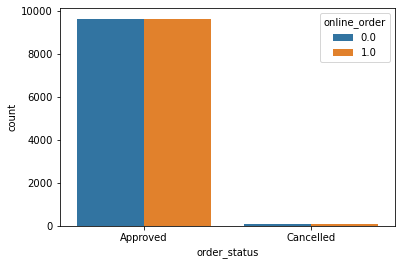

In [70]:
sns.countplot(x = "order_status",hue = "online_order" ,data = df1)
plt.savefig("fig1.png")
plt.show()

# most orders where online and where also approved

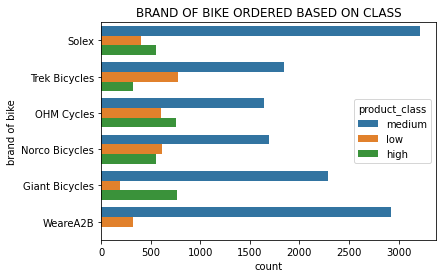

In [71]:
sns.countplot(y = "brand",hue = "product_class" ,data = df1)
plt.title("BRAND OF BIKE ORDERED BASED ON CLASS")
plt.ylabel("brand of bike")
plt.savefig("fig2.png")
plt.show()

### most of the bike brands ordered where medium class with solex brand having the most order for medium class bike,then followed by wearA2B,then giant bicycles,then trek bikes, then norco bikes and finally OHM cycles
### giant bikes and OHM bikes are the most ordered high class bikes
### trek bikes are the most ordered low class bikes 

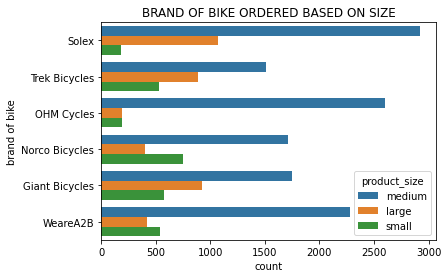

In [72]:
sns.countplot(y = "brand",hue = "product_size" ,data = df1)
plt.title("BRAND OF BIKE ORDERED BASED ON SIZE")
plt.ylabel("brand of bike")
plt.savefig("fig3.png")
plt.show()

### most ordered bike size was medium sized bikes,with solex having the most orders,followered by OHM bikes , then WearA2B bikes,giant bikes,norco bikes and finally trek bikes.
### norco bikes is the most ordered small sized bike
### solex bike is the most ordered large bike

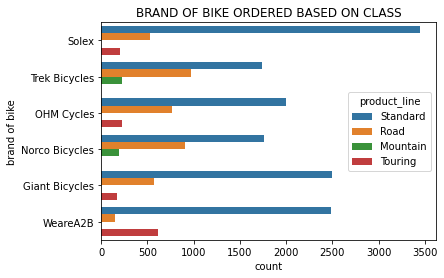

In [73]:
sns.countplot(y = "brand",hue = "product_line" ,data = df1)
plt.title("BRAND OF BIKE ORDERED BASED ON CLASS")
plt.ylabel("brand of bike")
plt.savefig("fig4.png")
plt.show()

In [74]:
df1.product_line.unique()

array(['Standard', 'Road', 'Mountain', 'Touring'], dtype=object)

In [75]:
print("minimum list price "+ str(df1.list_price.min()))
print("maximum list prce "+ str(df1.list_price.max()))

minimum list price 12.01
maximum list prce 2091.47


In [76]:
df1["difference"] = df1.list_price - df1.standard_cost

#b  df1[df1.difference <= 0] # no negative values

In [77]:
df1.tail()

,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,difference
19995,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0,802.26
19996,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0,104.24
19997,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,1592.19
19998,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0,91.15
19999,2017-09-22,1.0,Approved,Trek Bicycles,Standard,medium,small,1775.81,1580.47,36334.0,195.34


In [78]:
all1 = []

for i in df1.brand.unique():
    all1.append(df1.brand.str.count(i).sum())
    
all1

[4169, 2931, 2993, 2863, 3244, 3245]

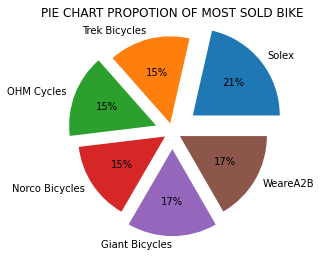

In [79]:
labels = ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles','Giant Bicycles', 'WeareA2B']
plt.pie(all1, labels = labels,autopct='%.0f%%', explode = (0.3,0.1,0.2,0.1,0.2,0.1))
plt.title("PIE CHART PROPOTION OF MOST SOLD BIKE")
plt.show()

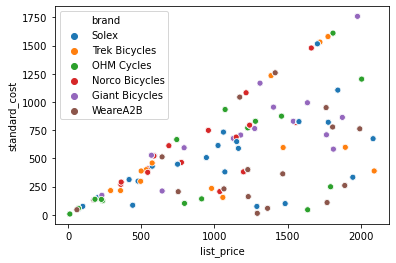

In [80]:
sns.scatterplot(data = df1, x = 'list_price', y = 'standard_cost', hue = "brand")
plt.show()

In [81]:
sns.displot(df1, x = "product_first_sold_date",hue = "brand",element = "step")
plt.title("PRODUCT SOLD DISTRIBUTION PLOT")
plt.show()

AttributeError: module 'seaborn' has no attribute 'displot'

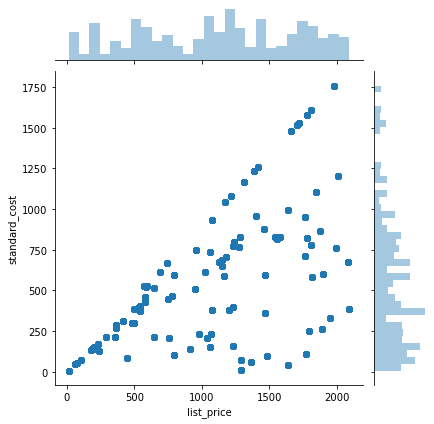

In [82]:
sns.jointplot(data=df1, x="list_price", y="standard_cost")

plt.show()

In [83]:
df2.head()

,Unnamed: 0,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [84]:
df2.drop(columns = df2.iloc[:,:2], inplace = True)

In [85]:
df2.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [86]:
df2.drop_duplicates()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...
3995,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,No,19.0
3996,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,Yes,1.0
3997,Sarene,Woolley,U,60,NaN,Assistant Manager,IT,High Net Worth,N,No,NaN
3998,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Yes,10.0


In [87]:
df2.dropna()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
8,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0
9,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0
...,...,...,...,...,...,...,...,...,...,...,...
3992,Andi,Dumelow,Female,6,1974-12-05,Librarian,Entertainment,Mass Customer,N,No,10.0
3993,Stephie,Byars,Female,5,1989-04-07,Structural Analysis Engineer,Manufacturing,Affluent Customer,N,No,12.0
3994,Rusty,Iapico,Male,93,1975-12-12,Staff Scientist,Manufacturing,Mass Customer,N,Yes,14.0
3995,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,No,19.0


In [88]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           4000 non-null   object 
 1   last_name                            3875 non-null   object 
 2   gender                               4000 non-null   object 
 3   past_3_years_bike_related_purchases  4000 non-null   int64  
 4   DOB                                  3913 non-null   object 
 5   job_title                            3494 non-null   object 
 6   job_industry_category                3344 non-null   object 
 7   wealth_segment                       4000 non-null   object 
 8   deceased_indicator                   4000 non-null   object 
 9   owns_car                             4000 non-null   object 
 10  tenure                               3913 non-null   float64
dtypes: float64(1), int64(1), objec

In [89]:
df2.shape

(4000, 11)

In [90]:
df2.gender.unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

In [91]:
mapping = {'F':1, 'Male':0, 'Female':1, 'U':0, 'Femal':1, 'M':0}
df2.gender = df2.gender.map(mapping) #mapping female to 1 and male to 0

In [92]:
df2.gender.unique()

array([1, 0], dtype=int64)

In [93]:
df2.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,Laraine,Medendorp,1,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,Eli,Bockman,0,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,Arlin,Dearle,0,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,Talbot,NaN,0,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,Sheila-kathryn,Calton,1,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


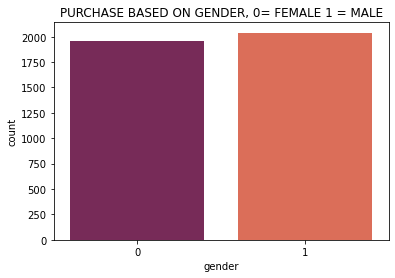

In [94]:
sns.countplot(data = df2, x = "gender",palette ='rocket')
plt.title("PURCHASE BASED ON GENDER, 0= FEMALE 1 = MALE")
plt.savefig("gender.png")
plt.show()

### FEMALE are the most customers

In [95]:
df2['age']= 2023 - pd.to_datetime(df2.DOB).dt.year #converting the column to datetime format

In [96]:
df2.head(20)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
0,Laraine,Medendorp,1,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,70.0
1,Eli,Bockman,0,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,43.0
2,Arlin,Dearle,0,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,69.0
3,Talbot,NaN,0,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,62.0
4,Sheila-kathryn,Calton,1,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,46.0
5,Curr,Duckhouse,0,35,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13.0,57.0
6,Fina,Merali,1,6,1976-02-23,NaN,Financial Services,Affluent Customer,N,Yes,11.0,47.0
7,Rod,Inder,0,31,1962-03-30,Media Manager I,NaN,Mass Customer,N,No,7.0,61.0
8,Mala,Lind,1,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0,50.0
9,Fiorenze,Birdall,1,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0,35.0


In [97]:
df2.age.max()

180.0

In [98]:
df2.age.min()

21.0

In [99]:
df2.drop_duplicates()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
0,Laraine,Medendorp,1,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,70.0
1,Eli,Bockman,0,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,43.0
2,Arlin,Dearle,0,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,69.0
3,Talbot,NaN,0,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,62.0
4,Sheila-kathryn,Calton,1,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,Rosalia,Halgarth,1,8,1975-08-09,VP Product Management,Health,Mass Customer,N,No,19.0,48.0
3996,Blanch,Nisuis,1,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,Yes,1.0,22.0
3997,Sarene,Woolley,0,60,NaN,Assistant Manager,IT,High Net Worth,N,No,NaN,NaN
3998,Patrizius,NaN,0,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Yes,10.0,50.0


In [100]:
df2.dropna()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
0,Laraine,Medendorp,1,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,70.0
1,Eli,Bockman,0,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,43.0
2,Arlin,Dearle,0,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,69.0
8,Mala,Lind,1,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0,50.0
9,Fiorenze,Birdall,1,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3992,Andi,Dumelow,1,6,1974-12-05,Librarian,Entertainment,Mass Customer,N,No,10.0,49.0
3993,Stephie,Byars,1,5,1989-04-07,Structural Analysis Engineer,Manufacturing,Affluent Customer,N,No,12.0,34.0
3994,Rusty,Iapico,0,93,1975-12-12,Staff Scientist,Manufacturing,Mass Customer,N,Yes,14.0,48.0
3995,Rosalia,Halgarth,1,8,1975-08-09,VP Product Management,Health,Mass Customer,N,No,19.0,48.0


In [101]:
df2.head(20)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
0,Laraine,Medendorp,1,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,70.0
1,Eli,Bockman,0,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,43.0
2,Arlin,Dearle,0,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,69.0
3,Talbot,NaN,0,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,62.0
4,Sheila-kathryn,Calton,1,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,46.0
5,Curr,Duckhouse,0,35,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13.0,57.0
6,Fina,Merali,1,6,1976-02-23,NaN,Financial Services,Affluent Customer,N,Yes,11.0,47.0
7,Rod,Inder,0,31,1962-03-30,Media Manager I,NaN,Mass Customer,N,No,7.0,61.0
8,Mala,Lind,1,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0,50.0
9,Fiorenze,Birdall,1,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0,35.0


In [102]:
count1 = 0
count2 = 0
count4 = 0

for i in df2.age:
    if i >= 50:
        count1 +=  1
    elif i >= 20:
        count2 += 1
    else:
        count4 += 1
        

counts = [count1,count2,count4]
counts

[1440, 2473, 87]

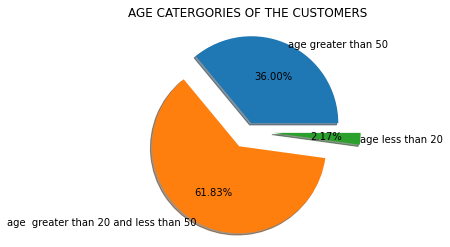

In [103]:
mapping = {str(count1):"age greater than 50",str(count2):"age  greater than 20 and less than 50",str(count4):"age less than 20"}
plt.pie(counts,labels = mapping.values(),autopct = '%.2f%%',explode = (0.1,0.2,0.3),shadow = True, labeldistance=1.0)
plt.title("AGE CATERGORIES OF THE CUSTOMERS")
plt.savefig("fig5.png")
plt.show()

In [113]:
sns.histplot(data = df2 ,x = "age",kde = True)
plt.title("AGE DISTRIBUTION")
plt.savefig("fig7.png")
plt.show()

AttributeError: module 'seaborn' has no attribute 'histplot'

In [105]:
lb = LabelEncoder()
df2.owns_car = lb.fit_transform(df2.owns_car) #yes mapped to 1 and no to 0
df2.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
0,Laraine,Medendorp,1,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,1,11.0,70.0
1,Eli,Bockman,0,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,1,16.0,43.0
2,Arlin,Dearle,0,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,1,15.0,69.0
3,Talbot,NaN,0,33,1961-10-03,NaN,IT,Mass Customer,N,0,7.0,62.0
4,Sheila-kathryn,Calton,1,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,1,8.0,46.0


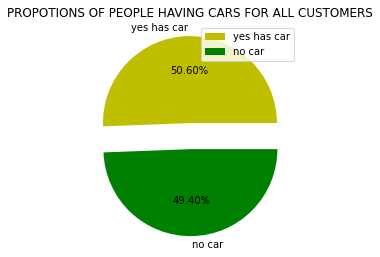

In [106]:
cnt1 = 0
cnt2 = 0

for i in df2.owns_car:
    if i == 1:
        cnt1 += 1
    else:
        cnt2 += 1
        
f = [cnt1,cnt2]
mapp = {str(cnt1):"yes has car",str(cnt2): "no car"}
plt.pie(f,labels = mapp.values(),explode = (0.1,0.2),autopct = '%.2f%%', colors = ['y','g'])
plt.title("PROPOTIONS OF PEOPLE HAVING CARS FOR ALL CUSTOMERS")
plt.savefig('fig6.png')
plt.legend()
plt.show()

In [107]:
women =  df2[df2.gender == 1]
men = df2[df2.gender == 0]

In [114]:
women.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
0,Laraine,Medendorp,1,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,1,11.0,70.0
4,Sheila-kathryn,Calton,1,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,1,8.0,46.0
6,Fina,Merali,1,6,1976-02-23,NaN,Financial Services,Affluent Customer,N,1,11.0,47.0
8,Mala,Lind,1,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,1,8.0,50.0
9,Fiorenze,Birdall,1,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,1,20.0,35.0


In [116]:
women.iloc[:,3].sum()

98359

In [117]:
men.iloc[:,3].sum()

97201

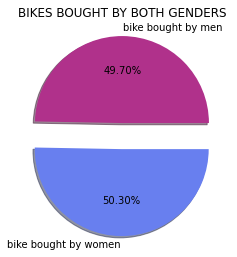

In [130]:
plt.pie([men.iloc[:,3].sum(),women.iloc[:,3].sum()],colors = ['#b0318b','#687fef'],explode=(0.1,0.2),shadow = True,labels = ["bike bought by men","bike bought by women"],autopct = '%.2f%%')
plt.title("BIKES BOUGHT BY BOTH GENDERS")
plt.savefig("fig8.png")
plt.show()

In [132]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.
